### Importing the basic libraries.

In [57]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [58]:
df =pd.read_csv(r'C:\Users\DELL\Downloads\Automobile_insurance_fraud.csv')
df.head() ### Checking the dataset 

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [59]:
### Checking the shape of the dataset
df.shape

(1000, 40)

In [60]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [61]:
### Will remove some unnecessary columns which dose not has any relation with fraud_report. 
df.drop(columns=['policy_number','policy_bind_date','property_damage','bodily_injuries','_c39','incident_location','insured_education_level','insured_hobbies','insured_occupation'],inplace=True)

In [62]:
### Again check the data shape
df.shape

(1000, 31)

In [63]:
### Checking the datatype
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
injury_claim                     int64
property_claim           

In [64]:
### Seen in the dataset that some entries are ?. Going to find and replace
df.isin(["?"]).sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
auto_make                        0
auto_model          

In [68]:
df=df.replace("?", np.nan) ### Replacing the ? with nan.

In [69]:
df.isin(["?"]).sum() ### Recheck is the ? is filled or not?

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model                     0
auto_year                      0
fraud_repo

In [70]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
auto_make                        0
auto_model          

### There are two columns which has null values categorical values. I will fill these column with median. 

In [78]:
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])
df['police_report_available']=df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [79]:
### Recheck the datatset
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model                     0
auto_year                      0
fraud_repo

### Null values are filled. Now proceed with EDA

## EDA

In [80]:
### Importing the basic visualization matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [82]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_relationship,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,husband,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,other-relative,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,own-child,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,unmarried,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,unmarried,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


N    753
Y    247
Name: fraud_reported, dtype: int64


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

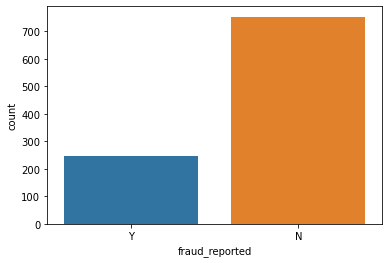

In [87]:
print(df['fraud_reported'].value_counts())
sns.countplot(x='fraud_reported', data=df)

### Fraud report shows that there are very less number who did very less fraud.

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


<AxesSubplot:xlabel='policy_state', ylabel='count'>

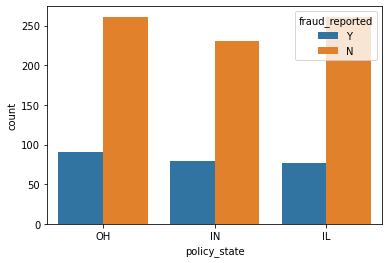

In [84]:
print(df['policy_state'].value_counts())
sns.countplot(x='policy_state', hue='fraud_reported', data=df)

### All states has almost same result with fraud_reported

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


<AxesSubplot:xlabel='insured_sex', ylabel='count'>

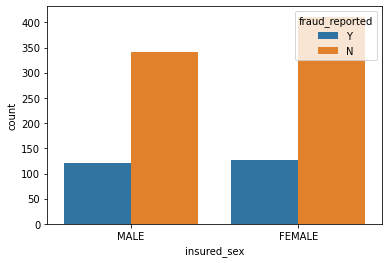

In [86]:
print(df['insured_sex'].value_counts())
sns.countplot(x='insured_sex', hue='fraud_reported', data=df)

### All states has almost same result with fraud_reported

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

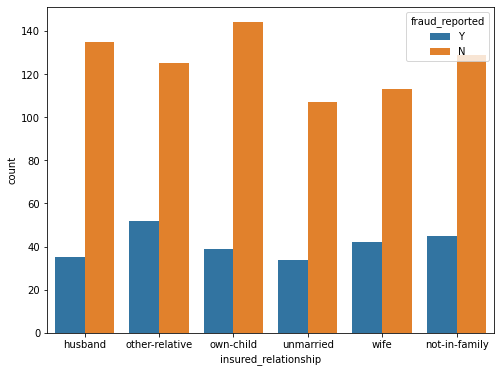

In [89]:
print(df['insured_relationship'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='insured_relationship', hue='fraud_reported', data=df)

### Almost All feature has same value with the fraud report but other relative has more outcomes with other-relatives

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


<AxesSubplot:xlabel='incident_type', ylabel='count'>

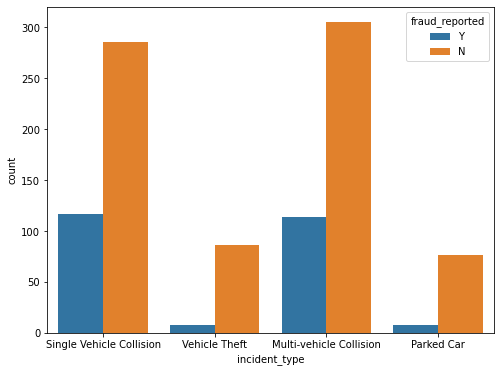

In [90]:
print(df['incident_type'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='incident_type', hue='fraud_reported', data=df)

### Single vehical and multi-vehical has more report with fraus and non fraud results.

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


<AxesSubplot:xlabel='collision_type', ylabel='count'>

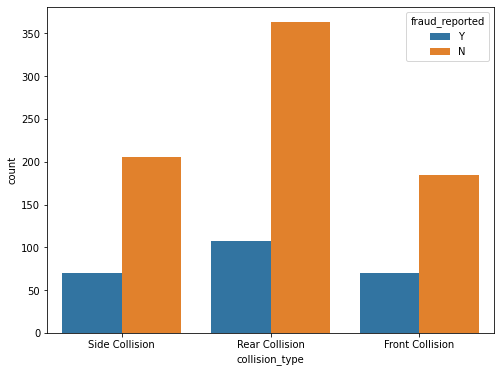

In [91]:
print(df['collision_type'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='collision_type', hue='fraud_reported', data=df)

### Rear Collision has more result with fraud report rest two collision has almost same fraud report.

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


<AxesSubplot:xlabel='incident_severity', ylabel='count'>

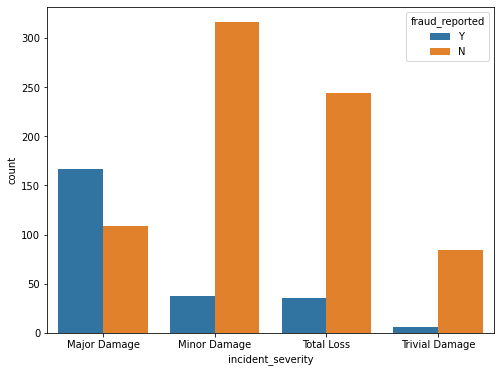

In [92]:
print(df['incident_severity'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='incident_severity', hue='fraud_reported', data=df)

### Incident serverity has more fraud report with Major Damage and minor Damage.

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

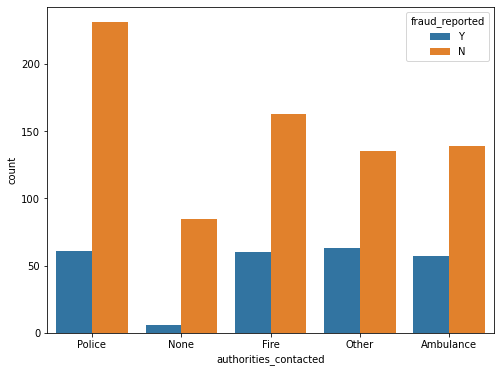

In [94]:
print(df['authorities_contacted'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='authorities_contacted', hue='fraud_reported', data=df)

### People first contacted to police and Ambulance and also has more fraud results with these two columns.

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


<AxesSubplot:xlabel='incident_state', ylabel='count'>

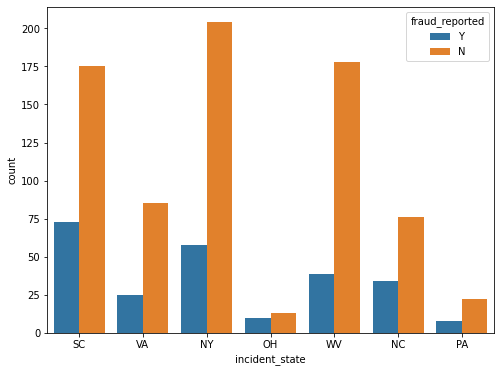

In [95]:
print(df['incident_state'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='incident_state', hue='fraud_reported', data=df)

### The most fraud cases found in south carolina and new your state.

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


<AxesSubplot:xlabel='incident_city', ylabel='count'>

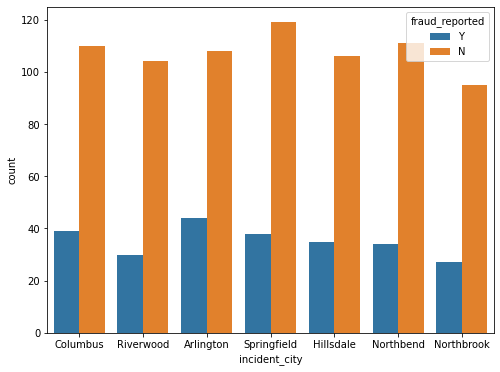

In [96]:
print(df['incident_city'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='incident_city', hue='fraud_reported', data=df)

### All cities almost has same fraud report

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

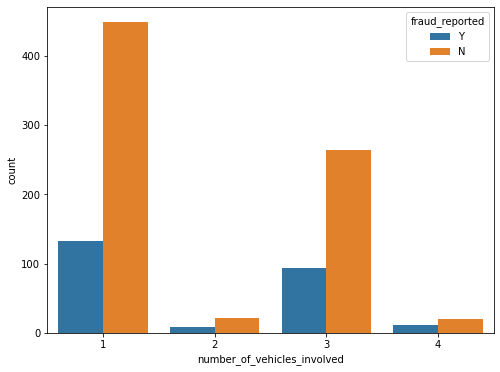

In [99]:
print(df['number_of_vehicles_involved'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='number_of_vehicles_involved', hue='fraud_reported', data=df)

### Involvement of single vehical has more fraud report. 

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


<AxesSubplot:xlabel='witnesses', ylabel='count'>

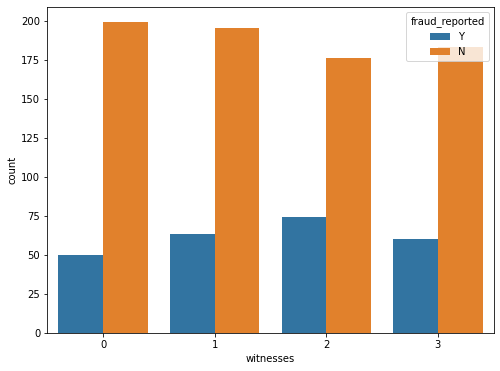

In [100]:
print(df['witnesses'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='witnesses', hue='fraud_reported', data=df)

### All witness has almost same results with fraud report.

NO     686
YES    314
Name: police_report_available, dtype: int64


<AxesSubplot:xlabel='police_report_available', ylabel='count'>

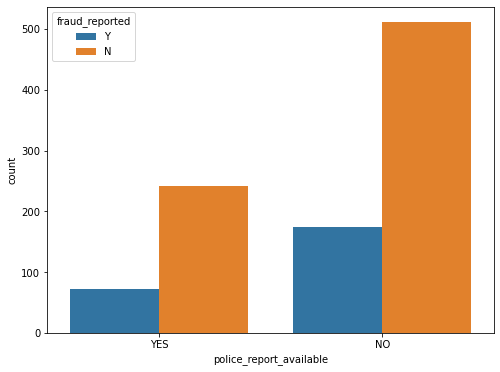

In [102]:
print(df['police_report_available'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='police_report_available', hue='fraud_reported', data=df)

### Withour police report has more fraud results.

Dodge         80
Suburu        80
Saab          80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


<AxesSubplot:xlabel='auto_make', ylabel='count'>

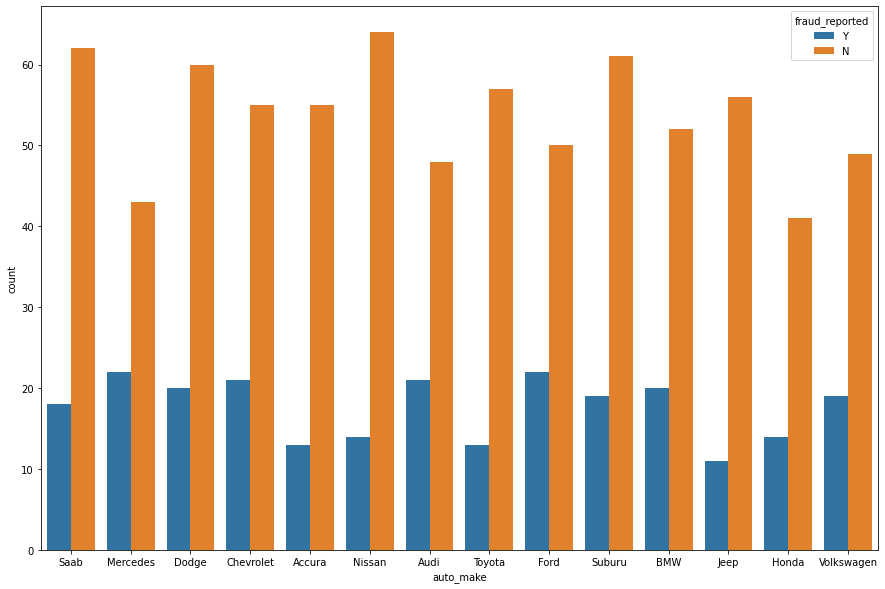

In [105]:
print(df['auto_make'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(x='auto_make', hue='fraud_reported', data=df)

### All the auto make has almost same fraud results.

### We checked the relation of the fraus report with various columns but some feature are left. So, I will check these columns with scatter plot before plotting the scatter plot I will change the categorical values into integers.

In [107]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
injury_claim                     int64
property_claim           

In [111]:
### Importing the Label endoder.
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
col=['policy_state', 'policy_state', 'policy_csl', 'policy_state', 'policy_state',
       'incident_city', 'incident_state', 'incident_severity', 'collision_type',
       'incident_date','insured_relationship','insured_sex','incident_type','authorities_contacted','police_report_available','auto_make','auto_model','fraud_reported']
df[col]= df[col].apply(le.fit_transform)

In [112]:
### Recheck the dataset 
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int64
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int64
insured_relationship             int64
capital-gains                    int64
capital-loss                     int64
incident_date                    int64
incident_type                    int32
collision_type                   int64
incident_severity                int64
authorities_contacted            int32
incident_state                   int32
incident_city                    int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
witnesses                        int64
police_report_available          int32
total_claim_amount               int64
injury_claim                     int64
property_claim           

### All the columns has successfully changed to the integer. Now plotting the scatter plot.

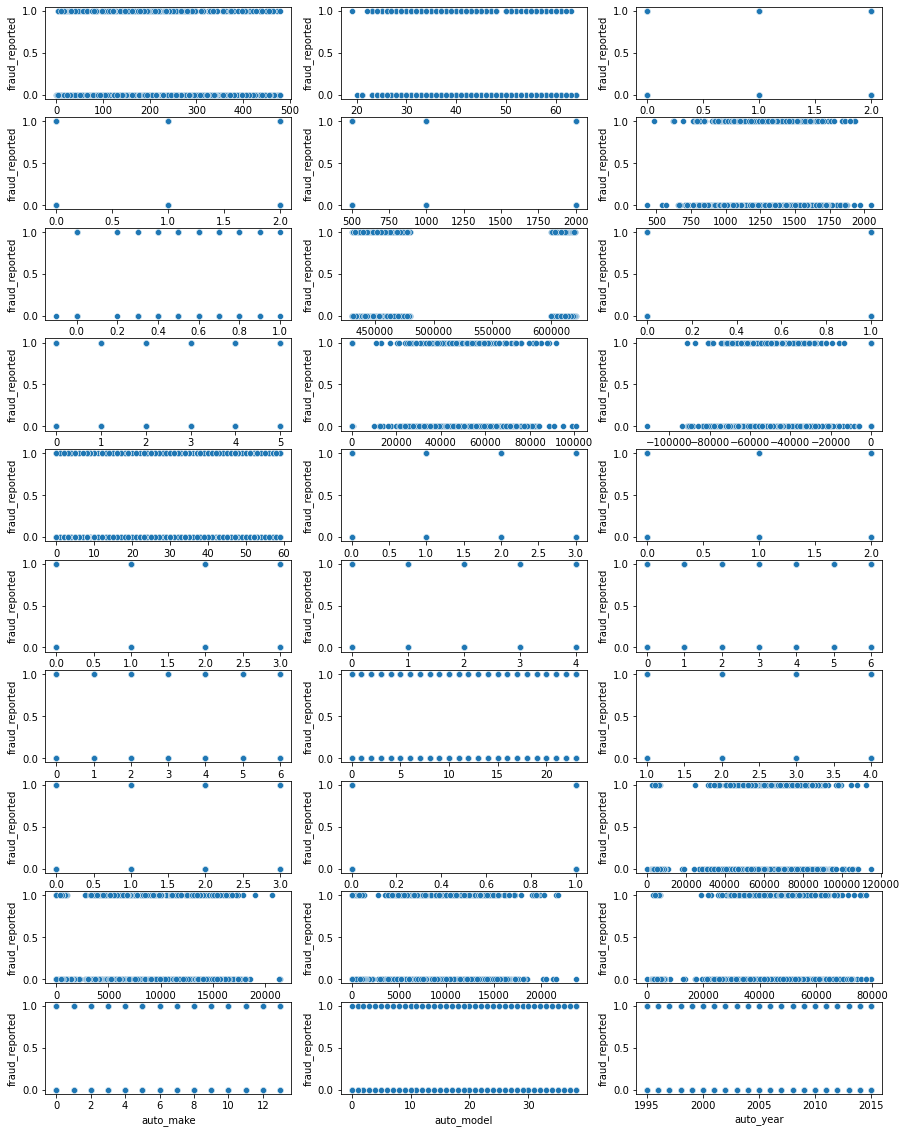

In [126]:
#### Plotting scatterplot to check the trend between features and target
x=df.drop(columns='fraud_reported')
y=df['fraud_reported']
plt.figure(figsize=(15,20))
pn=1
for column in x:
    if pn <= 32:
        plt.subplot(10,3, pn)
        sns.scatterplot(x[column],y )
        plt.xlabel(column, fontsize= 10)
    pn+=1
plt.show()

### All the features has good relation with target. Most of the feature are categorical values.

## Checking the multicolinearity. 

<function matplotlib.pyplot.show(close=None, block=None)>

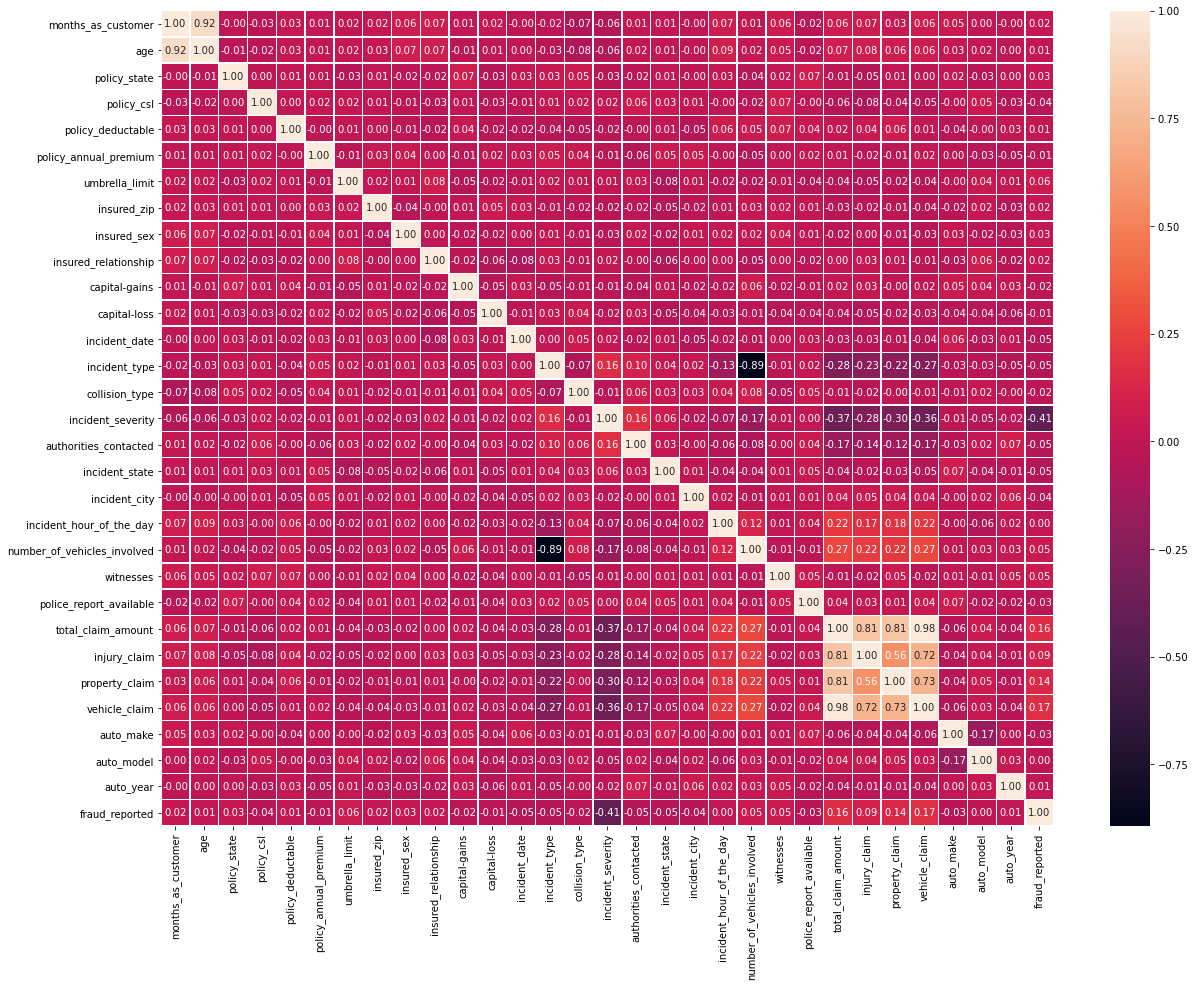

In [128]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

### No featues has multicollinearity with each other expect four feature which is Property clain,vehical claim,injury claim and total claim which is more than 73% but these feature only has strong relation with target and these percentage with target is different.So, I do not need to drop any feature. 

### The target has maximum trend with - Vehical Claim (17%)
### The target has minimum trend with - age(1%)

### Every feature has not strong trend with target expect. So, I will keep all feature for Model building.

## Checking the distribution 

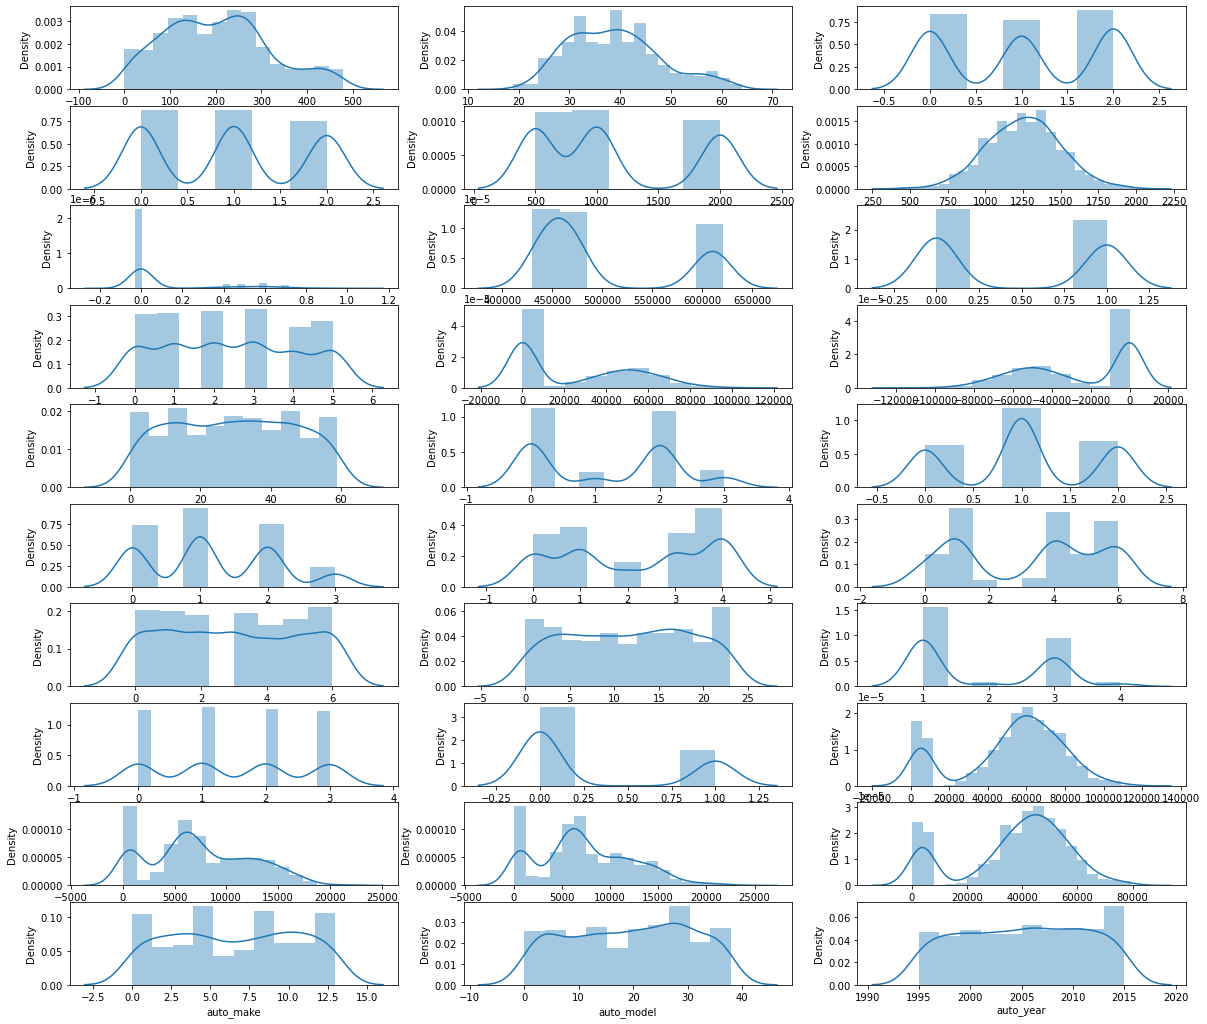

In [183]:
## As there are very more feature. So, I will plot in two parts 
plt.figure(figsize=(20,18))
pn=1
for column in df:
    if pn < 31:
        plt.subplot(10,3, pn)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize= 10)
    pn+=1
plt.show()

In [167]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make', 'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

### Most of the feature are categorical values -

### months_as_customer has good distribution
### Age has normal values distribution
### umbrella_limit has good values distribution
### capital-gains has good values distribution but left skewed
### capital-loss has good values distribution but right skewed
### number_of_vehicles_involved has normal values distribution.
### total_claim_amount has normal values distribution.
### injury_claim has normal values distribution.
### property_claim has normal values distribution.
### vehicle_claim has normal values distribution.

## Cheking the skewness

In [170]:
x.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
witnesses                      0.019636
police_report_available        0.802728
total_claim_amount            -0.594582
injury_claim                   0.264811


### Only one feature has more skewness other features are not skewed. So, I will not going to deal with skewness.

### Checking the stats

In [179]:
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_relationship,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.416000,...,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.681003,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,2.000000,...,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,4.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,5.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


### All stats show normal. Going forward to check outliers.

## Outliers

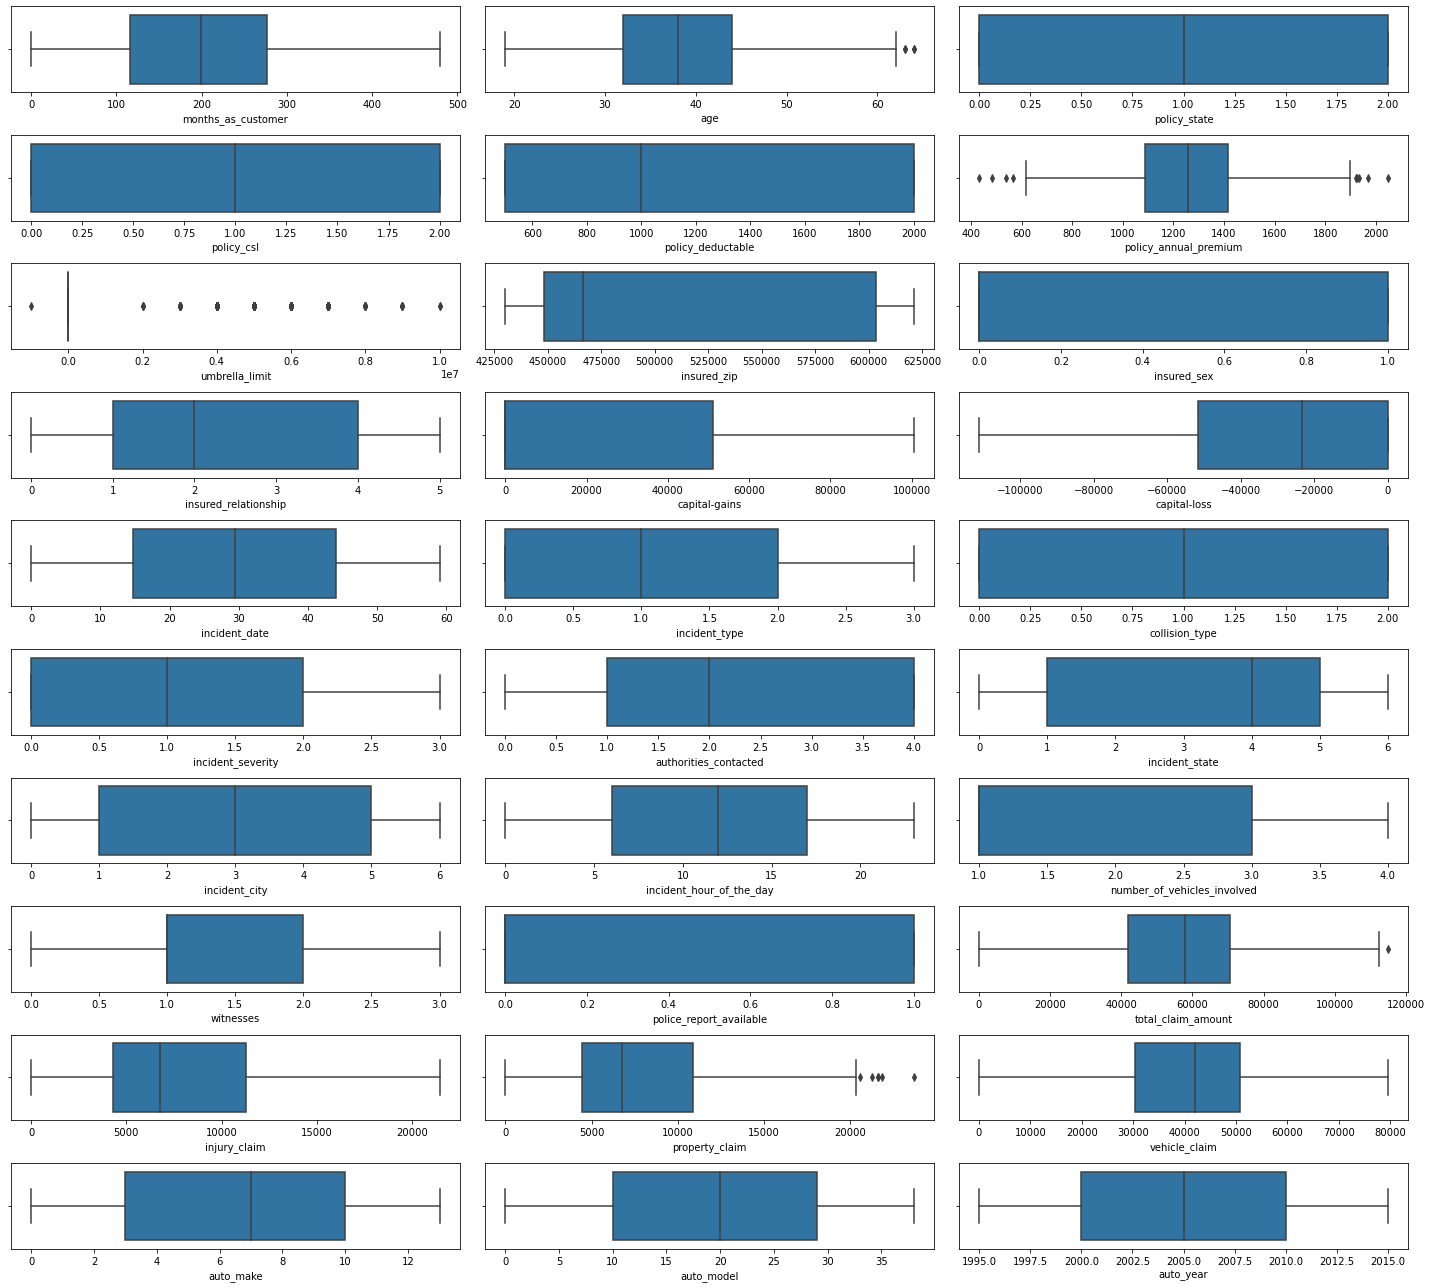

In [182]:
plt.figure(figsize=(20,18))
pn = 1
for column in df:
    if pn < 31:
        ax = plt.subplot(10,3, pn)
        sns.boxplot(df[column])
        plt.xlabel(column)
    pn+=1
plt.tight_layout()

### Very few features has outliers which is 5 out of 31. I will deal with these outliers with zscore.

In [185]:
df.shape

(1000, 31)

In [186]:
## Importing the z-score and apply to the data set.
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
np.where(z<3)

(array([  0,   0,   0, ..., 999, 999, 999], dtype=int64),
 array([ 0,  1,  2, ..., 28, 29, 30], dtype=int64))

In [187]:
df_new = df[(z<3).all(axis=1)]
df_new.shape

(980, 31)

In [188]:
### Dataloss
data_loss= (1000-980)/1000*100
print("Data loss of the dataset", data_loss)

Data loss of the dataset 2.0


### 2% of dataloss is acceptable. So, I will proceed futher to build model.

## Seperating the dataset into the feature and target and importing the basic model building libraries 

In [189]:
x= df_new.drop(columns="fraud_reported")
y=df_new["fraud_reported"]

In [190]:
### Importing some preprocesing library for model 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [191]:
### Scaling then feature with standard scaler 
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [205]:
#### Splitting the dataset into traing data and testing data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.25, random_state=25)
print(len(x_train), len(y_train), len(x_test), len(y_test))

735 735 245 245


In [206]:
### Importing the model building libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [207]:
### Importing the LogisticRegression and checking the score and cross validation score 
lr= LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
acc_lr =accuracy_score(y_test,pred_lr)
scr = cross_val_score(lr, x,y, cv=5)
Clas_r = classification_report(y_test,pred_lr)
con = confusion_matrix(y_test,pred_lr)
Corss_lr = scr.mean()

print("\n LogisticRegression Model Accuracy ",  '\nAccuracy_score for LogisticRegression model', acc_lr*100, "\n Cross Validation score is ",Corss_lr*100, '\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 LogisticRegression Model Accuracy  
Accuracy_score for LogisticRegression model 76.32653061224491 
 Cross Validation score is  75.40816326530611 
 Classification report is  
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       188
           1       0.49      0.44      0.46        57

    accuracy                           0.76       245
   macro avg       0.66      0.65      0.66       245
weighted avg       0.75      0.76      0.76       245
 
 Confusion Metrix is 
 [[162  26]
 [ 32  25]]


In [208]:
### Importing the RandomForestClassifier and  checking the score and cross validation score  
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
acc_RFC =accuracy_score(y_test,pred_RFC)
scr = cross_val_score(RFC, x_scaled,y, cv=5)
Corss_rfc = scr.mean()
Clas_r = classification_report(y_test,pred_RFC)
con = confusion_matrix(y_test,pred_RFC)

print("\n RandomForestClassifier Model Accuracy",  '\n\nAccuracy_score for RandomForestClassifier model', acc_RFC*100, "\n Cross Validation score is ",Corss_rfc*100, '\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 RandomForestClassifier Model Accuracy 

Accuracy_score for RandomForestClassifier model 76.73469387755102 
 Cross Validation score is  78.16326530612245 
 Classification report is  
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       188
           1       0.50      0.39      0.44        57

    accuracy                           0.77       245
   macro avg       0.66      0.63      0.64       245
weighted avg       0.75      0.77      0.76       245
 
 Confusion Metrix is 
 [[166  22]
 [ 35  22]]


In [209]:
### Importing the DecisionTreeClassifier and checking the score and cross validation score  
DTC= DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC=DTC.predict(x_test)
acc_DTC =accuracy_score(y_test,pred_DTC)
scr = cross_val_score(DTC, x_scaled,y, cv=5)
Corss_dtc = scr.mean()
Clas_r = classification_report(y_test,pred_DTC)
con = confusion_matrix(y_test,pred_DTC)

print("\n DecisionTreeClassifier Model Accuracy",  '\n\nAccuracy_score for DecisionTreeClassifier model', acc_DTC*100, "\n Cross Validation score is ",Corss_dtc*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 DecisionTreeClassifier Model Accuracy 

Accuracy_score for DecisionTreeClassifier model 69.38775510204081 
 Cross Validation score is  70.3061224489796 
 Classification report is  
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       188
           1       0.36      0.40      0.38        57

    accuracy                           0.69       245
   macro avg       0.59      0.59      0.59       245
weighted avg       0.71      0.69      0.70       245
 
 Confusion Metrix is 
 [[147  41]
 [ 34  23]]


In [210]:
### Importing the KNeighborsClassifier and checking the score and cross validation score 
KNC= KNeighborsClassifier()
KNC.fit(x_train,y_train)
pred_KNC=KNC.predict(x_test)
acc_KNC =accuracy_score(y_test,pred_KNC)
scr = cross_val_score(KNC, x_scaled,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_KNC)
con = confusion_matrix(y_test,pred_KNC)
print("\n KNeighborsClassifier Model Accuracy",  '\n\nAccuracy_score for KNeighborsClassifier model', acc_KNC*100, "\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 KNeighborsClassifier Model Accuracy 

Accuracy_score for KNeighborsClassifier model 74.6938775510204 
 Cross Validation score is  72.75510204081633 
 Classification report is  
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       188
           1       0.41      0.21      0.28        57

    accuracy                           0.75       245
   macro avg       0.60      0.56      0.56       245
weighted avg       0.70      0.75      0.71       245
 
 Confusion Metrix is 
 [[171  17]
 [ 45  12]]


In [211]:
### Importing the SVC and checking the score and cross validation score
svc= SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
acc_svc =accuracy_score(y_test,pred_svc)
scr = cross_val_score(svc, x,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_svc)
con = confusion_matrix(y_test,pred_svc)
print("\n SVC Model Accuracy",  '\n\nAccuracy_score for SVC model', acc_svc*100,"\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 SVC Model Accuracy 

Accuracy_score for SVC model 77.14285714285715 
 Cross Validation score is  75.51020408163265 
 Classification report is  
               precision    recall  f1-score   support

           0       0.79      0.96      0.87       188
           1       0.53      0.14      0.22        57

    accuracy                           0.77       245
   macro avg       0.66      0.55      0.54       245
weighted avg       0.73      0.77      0.72       245
 
 Confusion Metrix is 
 [[181   7]
 [ 49   8]]


In [213]:
### Importing the GradientBoostingClassifier and checking the score and cross validation score
gbc= GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
acc_gbc =accuracy_score(y_test,pred_gbc)
scr = cross_val_score(gbc, x,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_gbc)
con = confusion_matrix(y_test,pred_gbc)
print("\n GradientBoostingClassifier Model Accuracy",  '\n\nAccuracy_score for GradientBoostingClassifier model', acc_gbc*100,"\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 GradientBoostingClassifier Model Accuracy 

Accuracy_score for GradientBoostingClassifier model 75.51020408163265 
 Cross Validation score is  78.0612244897959 
 Classification report is  
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       188
           1       0.47      0.42      0.44        57

    accuracy                           0.76       245
   macro avg       0.65      0.64      0.64       245
weighted avg       0.75      0.76      0.75       245
 
 Confusion Metrix is 
 [[161  27]
 [ 33  24]]


### I performed 6 model prediction Accuracy score, those score are mentioned below - 


#### Accuracy score and cross validation score for LogisticRegression model 76.32  and cross validation score is 75.40 
#### Accuracy score cross validation score for RandomForestClassifier model 76.73 and cross validation score is 78.16 
#### Accuracy score cross validation score for DecisionTreeClassifier model 69.38 and cross validation score is 70.30
#### Accuracy score cross validation score for KNeighborsClassifier model 74.69  and cross validation score is 72.55
#### Accuracy score cross validation score  for SVC model 77.14 and cross validation score is 75.51
#### Accuracy score cross validation score  for GradientBoostingClassifier model 75.55 and cross validation score is 78.06

### From the above, I conclude that I will go forward with LogisticRegression because the accuracy is good compariosn to other model and aslo has very low difference in Cross validation score but we can do better hyperparameter tuning with LogisticRegression and RandomForestClassifier. May the Accuracy will increase.


In [218]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
para = {'n_estimators':range(1,5),
       'criterion':["entropy", "gini"],
        'max_depth':range(1,6),
    'min_samples_split':range(1,5),
    'min_samples_leaf':range(1,10)}
grid =  GridSearchCV(rfc, param_grid=para)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 6),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 5),
                         'n_estimators': range(1, 5)})

In [219]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 4}

In [244]:
### Importing the RandomForestRegressor and checking the score and r2 score
rr = RandomForestClassifier(criterion='gini',max_depth= 10, min_samples_leaf= 7, min_samples_split=2,n_estimators=25)
rr.fit(x_train,y_train)
pred_rr=rr.predict(x_test)
acc_rr =accuracy_score(y_test,pred_rr)
scr = cross_val_score(rr, x,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_rr)
con = confusion_matrix(y_test,pred_rr)
print("\n RandomForestClassifier Model Accuracy",  '\n\nAccuracy_score for RandomForestClassifier model', acc_rr*100,"\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 RandomForestClassifier Model Accuracy 

Accuracy_score for RandomForestClassifier model 78.36734693877551 
 Cross Validation score is  76.63265306122449 
 Classification report is  
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       188
           1       0.57      0.28      0.38        57

    accuracy                           0.78       245
   macro avg       0.69      0.61      0.62       245
weighted avg       0.76      0.78      0.75       245
 
 Confusion Metrix is 
 [[176  12]
 [ 41  16]]


## Conclusion - I tried multiple times to increase the accuracy of the model but did not get better results.I will go with RandomForestClassifier this model gives better result after the hyperparameter tunning. 

### ROC-AUC Curve

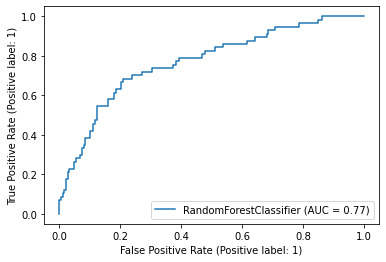

In [249]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rr ,x_test,y_test)
plt.show()

### ROC curve is 77% and score is pretty good.

### Saving the model

In [250]:
import joblib
joblib.dump(rr, 'Automobile_insurance_fraud')

['Automobile_insurance_fraud']